# Estimated VAR according to Monte Carlo simulation method

The risk value of the property portfolio shows the degree of loss that may occur for a portfolio of 1 cycle (time unit), with 100%reliability (1-alpha), signed The difference is Var (K, 1-alpha) and is determined as follows: P (x <= Var (k, 1- alpha)) = Alpha

Where x is the benefits or cycle value K of the portfolio, 0 <alpha <1. Thus, if the investor holds the list after the K cycle, with 100%reliability (1-alpha), the maximum loss is | Var (K, 1- Alpha) | Under normal operating market conditions.

In this research, I used the Vietnamese stock market index data in 2022 to measure the maximum reduction in 1 day.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
# Loading data
data_vnindex = pd.read_excel(r'C:\Users\DPC\Desktop\vnindex.xlsx')
data_vnindex.head()

,date,price,open,high,low,vol,change
0,2022-12-30,1007.09,1009.29,1017.99,1007.09,407.14K,0.00
1,2022-12-29,1009.29,1015.66,1021.96,1009.29,462.66K,-0.01
2,2022-12-28,1015.66,1004.57,1020.52,998.97,590.45K,0.01
3,2022-12-27,1004.57,985.21,1007.88,983.67,593.36K,0.02
4,2022-12-26,985.21,1020.34,1021.89,985.21,623.49K,-0.03


In [44]:
mean = data_vnindex.mean()
std = data_vnindex.std()
print(mean)
print(std)
# mean(change) = -0.001285
# std(change) =  0.015912

price      1252.773855
open       1254.811566
high       1264.952088
low        1240.666707
change       -0.001285
dtype: float64
date       104 days 07:30:30.900386374
price                       179.224113
open                        179.423184
high                         178.15876
low                         180.806243
change                        0.015912
dtype: object


C:\Users\DPC\AppData\Local\Temp\ipykernel_12520\3275056709.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = data_vnindex.mean()
C:\Users\DPC\AppData\Local\Temp\ipykernel_12520\3275056709.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = data_vnindex.mean()
C:\Users\DPC\AppData\Local\Temp\ipykernel_12520\3275056709.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = data_vnindex.std()


In [73]:
# random normal distribution
data_vnindex['normal'] = random.normal(loc=0, scale=1, size= len(data_vnindex))
data_vnindex.head()

,date,price,open,high,low,vol,change,normal
0,2022-12-30,1007.09,1009.29,1017.99,1007.09,407.14K,0.00,1.153695
1,2022-12-29,1009.29,1015.66,1021.96,1009.29,462.66K,-0.01,0.165613
2,2022-12-28,1015.66,1004.57,1020.52,998.97,590.45K,0.01,0.221752
3,2022-12-27,1004.57,985.21,1007.88,983.67,593.36K,0.02,1.155461
4,2022-12-26,985.21,1020.34,1021.89,985.21,623.49K,-0.03,-0.573798


Text(0, 0.5, 'Percentiles')

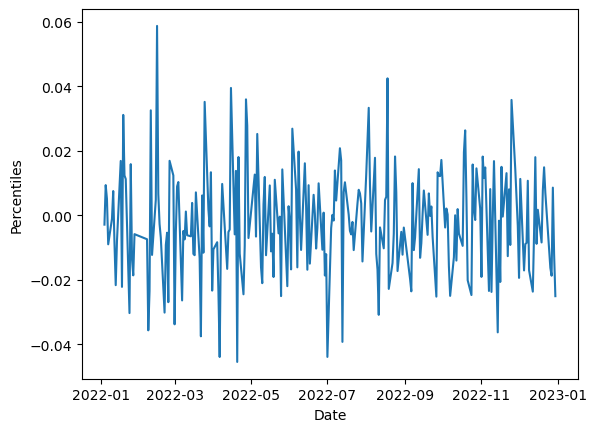

In [70]:
# yield series simulation
# mean(change) = -0.001285
# std(change) =  0.015912
data_vnindex['yield_series'] = data_vnindex['normal'] * 0.015912 -0.001285
data_vnindex.head()
plt.plot(data_vnindex['date'],data_vnindex['yield_series'])
plt.xlabel('Date')
plt.ylabel('Percentiles')


In [69]:
# maximum loss in 1 day with 95% confidence
maximum_loss = np.percentile(data_vnindex['yield_series'], 5) 
print(maximum_loss)


-0.025951280688511442


# About the Authors:

My name is Nguyen Hung Truong, I am currently a research consultant at Worldquant investment LLC. My main job is to focus on studying patterns to come up with optimal strategies in stock trading.